## Overview

We will be using the three datasets:

- <a href=https://graderdata.s3.amazonaws.com/securities.txt target=_blank>securities.csv</a>
- <a href=https://graderdata.s3.amazonaws.com/fundamentals.txt>fundamentals.csv</a>
- <a href=https://graderdata.s3.amazonaws.com/prices-split-adjusted.txt>split adjusted price.csv</a>

They were adapted from the webpage <a href=https://www.kaggle.com/dgawlik/nyse target=_blank>New York Stock Exchange</a>, where the original raw data can be found.

#### Prob 1.  Loading data

The csv file of split_adjusted_price.csv is saved in the url:

`url_adjusted = 'https://graderdata.s3.amazonaws.com/prices-split-adjusted.csv'`

Load the data into a pandas dataframe, make sure that the `date` column is of a proper type.

In [1]:
import pandas as pd

url_adjusted = 'https://graderdata.s3.amazonaws.com/prices-split-adjusted.csv'

### Your code here
split_adjusted_price = pd.read_csv(url_adjusted)
split_adjusted_price['date'] = pd.to_datetime(split_adjusted_price['date'])

### An alternative answer
split_adjusted_price = pd.read_csv(url_adjusted, parse_dates=[0])

#### Prob 2. Missing values

The dataset `fundamentals` is loaded for you. Find the columns with any missing value.

In [2]:
import numpy as np
import pandas as pd

fundamentals = pd.read_csv('https://graderdata.s3.amazonaws.com/fundamentals.csv', index_col=0)


#### Your code here
np.sum(fundamentals.isnull(), axis=0).sort_values(ascending=False).head(10)

Cash Ratio                                        299
Quick Ratio                                       299
Current Ratio                                     299
Estimated Shares Outstanding                      219
Earnings Per Share                                219
For Year                                          173
Accounts Receivable                                 0
Equity Earnings/Loss Unconsolidated Subsidiary      0
Goodwill                                            0
Gross Margin                                        0
dtype: int64

#### Prob 3. Aggregating

For the `split_adjusted_price` you loaded in Prob 1., aggregate the daily OHLC into monthly OHLC.

In [29]:
#### Your code here
# split_adjusted_price['month']= map(lambda x: x.month, split_adjusted_price['date'])
# split_adjusted_price.groupby(['symbol','month']).agg({
#         'open':'first', 'close':'last', 'low': np.min, 'high': np.max
#     })



#### An alternative way
A = split_adjusted_price.set_index('date').groupby(['symbol', 
                                                lambda x: x.month]).agg({
        'open':'first', 'close':'last', 'low': np.min, 'high': np.max
    }).reset_index(drop=False)

A.columns.values[1] = 'month'
A = A.iloc[[0,1,2,10,11,12,13,22,23,24,25],:]

In [30]:
import datetime as dt

#A['month'] = map(lambda x: dt.date(2017, x, 1).strftime('%Y.%b.%d').split('.')[1], A['month']) 
print A

   symbol  month        high       close       open        low
0       A      1   43.791130   37.650002  22.453504  19.971388
1       A      2   43.247498   37.349998  20.143061  20.121603
2       A      3   42.740002   39.849998  22.482117  22.482117
10      A     11   47.799999   43.980000  24.992848  23.762518
11      A     12   46.919998   45.560001  25.500715  23.254650
12    AAL      1   56.200001   38.990002   4.840000   4.470000
13    AAL      2   52.200001   41.000000   5.430000   5.350000
22    AAL     11   49.450001   46.439999  11.880000   3.960000
23    AAL     12   54.639999   46.689999  11.340000   4.820000
24    AAP      1  163.460007  152.050003  40.700001  38.380001
25    AAP      2  165.000000  148.440002  39.549999  39.080002


In [4]:
import matplotlib
import matplotlib.pyplot as plt

split_adjusted_price.loc[split_adjusted_price['symbol']=='AAPL'].set_index('date')['close'].plot()

#### Prob 4. String operation

From the column `Address of Headquarters` in the data frame `securities`, find the state/country/territory where the headquarter of each company locates.

**Hint**: Here are some examples of territories that is desired:
```
St. Paul, Minnesota -->  Minnesota
Dublin, Ireland     -->  Ireland
Hamilton, Bermuda   -->  Bermuda
```
This is a simple question testing you in string operations. You might find different notations for the same state (There are some observations with `New York` and other with `NY`), but for this question, you **DO NOT** need to take care of that.

In [5]:
import pandas as pd

securities = pd.read_csv('https://graderdata.s3.amazonaws.com/securities.csv')

#### Your code here
securities['Address of Headquarters'].apply(lambda x: x.split(',')[1].strip())

0           Minnesota
1            Illinois
2            Illinois
3             Ireland
4          California
5             Georgia
6          California
7            Virginia
8            Virginia
9         Connecticut
10      Massachusetts
11            Georgia
12         California
13       Pennsylvania
14      Massachusetts
15         Washington
16          Louisiana
17        Connecticut
18            Ireland
19            Ireland
20              Texas
21          Wisconsin
22           Illinois
23         California
24         California
25           Virginia
26         Washington
27           Missouri
28              Texas
29               Ohio
            ...      
475        California
476          New York
477           Alabama
478          Arkansas
479          Illinois
480             Texas
481     Massachusetts
482         Wisconsin
483        California
484              Ohio
485        California
486          Colorado
487          Virginia
488        Washington
489       

#### Prob 5. Return

Define the **daily return** by:

$$\frac{ \text{close} - \text{previous close} }{\text{previous close}}$$.

The code below:
```
tmp = split_adjusted_price[['date', 'symbol', 'close']].sort_values(['symbol', 'date'])
price = tmp.iloc[1:]
price = price.assign(prev_close= tmp['close'].iloc[:-1].values)
price = price.assign(prev_symbol= tmp['symbol'].iloc[:-1].values)
```
create a new data frame `price`, of which each row contains the previous close price. 


Notice that we include the column `prev_symbol` (which is the symbol of the previous price), to deal with the case when the previous price is for a different symbol (see the third row below):

```
             date symbol      close  prev_close prev_symbol
850752 2016-12-29   XLNX  60.740002   60.630001        XLNX
851252 2016-12-30   XLNX  60.369999   60.740002        XLNX
710    2010-01-04    XOM  69.150002   60.369999        XLNX
1178   2010-01-05    XOM  69.419998   69.150002         XOM
1646   2010-01-06    XOM  70.019997   69.419998         XOM
```

Create a new column, `daily_return `. The expected result is:

```
             date symbol  daily_return
718    2010-01-05      A     -0.010863
1186   2010-01-06      A     -0.003553
1654   2010-01-07      A     -0.001297
...           ...    ...           ...
850261 2016-12-28    ZTS     -0.005212
850761 2016-12-29    ZTS      0.003368
851261 2016-12-30    ZTS     -0.001678
```

As you might suspect, the indexes are irrelevant here.

In [6]:
#### Preparing the price data frame

tmp = split_adjusted_price[['date', 'symbol', 'close']].sort_values(['symbol', 'date'])
price = tmp.iloc[1:]
price = price.assign(prev_close= tmp['close'].iloc[:-1].values)
price = price.assign(prev_symbol= tmp['symbol'].iloc[:-1].values)

#### Your code here

price.loc[price['symbol']==price['prev_symbol']].\
assign(daily_return=price['close']/price['prev_close']-1)[['date', 'symbol', 'daily_return']]


#### Alternative

price.loc[price['symbol']==price['prev_symbol']]
price['daily_return'] = (price['close']-price['prev_close'])/price['prev_close']

#### Prob 6. Merge

Inner join `fundamentals` and `securities` by the ticker symbols. Save the result as an variable, you will need it for the latter problem.

In [7]:
#### Your code here

Ans = pd.merge(fundamentals, securities,
               left_on = 'Ticker Symbol',
               right_on= 'Ticker symbol')

#### Prob 7. Grouping and aggregation

From the merged data frame from Prob 6., find the `GICS Sector` with the highest average `After Tax ROE`.

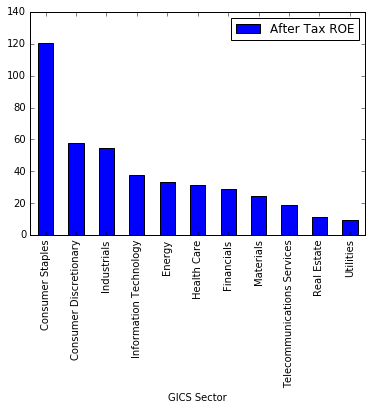

In [10]:
#### Your code here
%matplotlib inline

Ans.groupby('GICS Sector').agg({'After Tax ROE': np.mean}).sort_values('After Tax ROE', ascending=False).plot(kind='bar')